In [1]:
parsedfile = open('parsed600.csv','r')
current = parsedfile.readline().strip().split(',')
current = parsedfile.readline().strip().split(',')

parsed=[]
while(current != ['']):
    parsed.append(current)
    current = parsedfile.readline().strip().split(',')

len(parsed)  

5987

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
xvals=[]
yvals=[]
ptype=[]
prop_vals = []


for i in range(0,len(parsed)):
    xvals.append(float(parsed[i][0]))
    yvals.append(float(parsed[i][1]))
    ptype.append(int(parsed[i][2]))
    prop_vals.append(int(parsed[i][3])) 
len(yvals)

5987

In [3]:
max_y = -70.98
min_y = -71.15
max_x = 42.4
min_x = 42.30

x_new = []
y_new = []
p_new = []
prop_new=[]
for i in range(len(parsed)):
    if (xvals[i] > min_x and xvals[i] < max_x) and (yvals[i] > min_y and yvals[i] < max_y):
        x_new.append(xvals[i])
        y_new.append(yvals[i])
        p_new.append(ptype[i]) 
        prop_new.append(prop_vals[i])
        
xvals=x_new
yvals=y_new
ptype=p_new
prop_vals=prop_new
len(xvals)

4685

In [4]:
#320, 357, 358, 359, 300, 337, 344
#300, 320, 337, 344, 357, 358, 359
def getptypelabels(Ptype):
    labels = []
    for p in Ptype:
        if p == 300:
            labels.append('Hotel')
        if p == 320:
            labels.append('Retail')
        if p == 337:
            labels.append('Parking Lot')
        if p == 344:
            labels.append('Office 3-9 Story')
        if p == 357:
            labels.append('Retail Condo')
        if p == 358:
            labels.append('Office')
        if p == 359:
            labels.append('Condo Parking')
        if p == 387:
            labels.append('Pay Parking Lot')
        if p == 450:
            labels.append('Industrial Condo')
    return labels

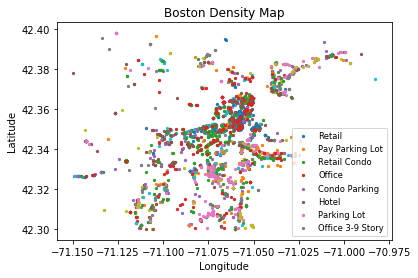

In [5]:
p=list(set(ptype))
p.sort()
ptype_catX = [[] for i in p]
ptype_catY = [[] for i in p]
for i in range(len(xvals)):
    for j in range(len(p)):
        if ptype[i] == p[j]:
            ptype_catX[j].append(xvals[i])
            ptype_catY[j].append(yvals[i])          

pop_indexes = []
for i in range(len(ptype_catX)):
    if len(ptype_catX[i]) >100:
        pop_indexes.append(i)
pop_ptypes = [p[i] for i in pop_indexes]

scat= []
for i in range(len(p)):
    if i in pop_indexes:
        a = plt.scatter(ptype_catY[i],ptype_catX[i], s=5)
        scat.append(a)
        
labels=getptypelabels(list(set(pop_ptypes)))
plt.title('Boston Density Map')
plt.legend(tuple(scat), tuple(labels),loc='best', fontsize='small', ncol=1)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [6]:
import matplotlib.pyplot as plt
import json    
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.feature_extraction import DictVectorizer
import sklearn.manifold
from sklearn.cluster import KMeans
from math import sqrt
from scipy.spatial import distance

df = pd.DataFrame(xvals, columns=['Longitude'])
df['Latitude'] = pd.DataFrame(yvals)
df['Ptype'] = pd.DataFrame(ptype)
df

min_max_scaler = preprocessing.MinMaxScaler()
long = min_max_scaler.fit_transform(df['Longitude'].values.reshape(-1,1))
lat = min_max_scaler.fit_transform(df['Latitude'].values.reshape(-1,1))

In [7]:
df['Latitude'] = pd.DataFrame(lat)
df['Longitude'] = pd.DataFrame(long)

ptype_scaled = min_max_scaler.fit_transform(df['Ptype'].values.reshape(-1,1))
ptype_scaled = [2*p for p in ptype_scaled] #weight
df['Ptype'] = pd.DataFrame(ptype_scaled)
df

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Longitude,Latitude,Ptype
0,0.793779,0.722392,0.327273
1,0.806227,0.733910,0.400000
2,0.803232,0.734369,0.242424
3,0.797874,0.728810,0.521212
4,0.794277,0.723163,0.521212
5,0.820222,0.728437,0.387879
6,0.819905,0.728554,0.387879
7,0.799018,0.730650,0.303030
8,0.798637,0.730037,0.303030
9,0.798256,0.729423,0.242424


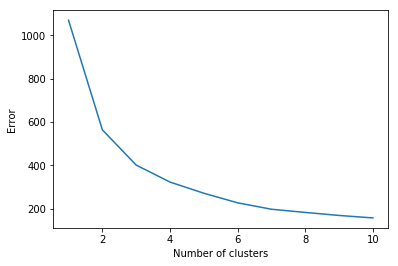

In [8]:
error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(df)
    error[k] = kmeans.inertia_
    
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
graph = plt.ylabel('Error')
plt.show()

6
42.3442134561054 -71.0717064525417
42.3728124 -71.049381391755
42.3253384934437 -71.1072478
42.3464814 -71.065945
42.3528305687998 -71.0612622011267
42.3322595714286 -71.0764400955986
[[0.44646677 0.46749482 1.7271008 ]
 [0.73672665 0.60138831 0.33323913]
 [0.25542935 0.25466323 0.59823365]
 [0.47036302 0.50223071 1.1705366 ]
 [0.53463156 0.53013122 0.64459671]
 [0.32573033 0.43945023 0.22041113]]


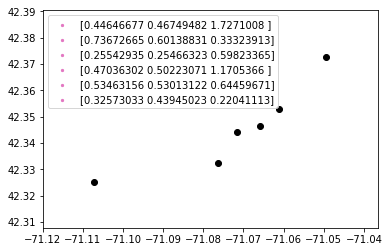

In [9]:
n_clust = 6

kmeans = KMeans(init='k-means++', n_clusters=n_clust, n_init=100)
kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

print(len(centroids))
scat= []
x_centr=[]
y_centr=[]
for val in centroids:
    xv=val[0]
    x_close = min(long, key=lambda x:abs(x-xv))
    ind = long.tolist().index(x_close)
    x = xvals[ind]
    x_centr.append(x)
    
    yv=val[1]
    y_close = min(lat, key=lambda x:abs(x-yv))
    ind = lat.tolist().index(y_close)
    y = yvals[ind]
    y_centr.append(y)
    print(x,y)
    scat.append(a)

plt.legend(tuple(scat), tuple(centroids))

print(centroids)

plt.scatter(y_centr, x_centr, alpha = 1.0, color = 'black')
plt.show()
x_close = min(long, key=lambda x:abs(x-xv))
#df['Longitude'] == min(long, key=lambda x:abs(x-xv))
ind = long.tolist().index(x_close)

The total error of the clustering is: 226.4560775602336.

Cluster labels:
[1 1 1 ... 5 5 5]

Counter({4: 1685, 5: 1168, 1: 579, 2: 574, 3: 397, 0: 282})


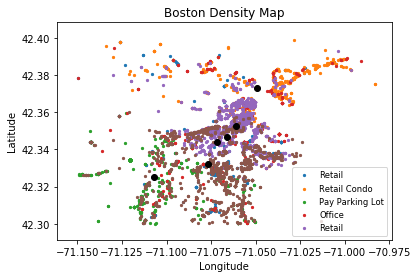

Cluster coordinates:

-71.0717064525417 42.3442134561054
-71.049381391755 42.3728124
-71.1072478 42.3253384934437
-71.065945 42.3464814
-71.0612622011267 42.3528305687998
-71.0764400955986 42.3322595714286


[440, 320, 357, 387, 358, 320]

In [10]:


print("The total error of the clustering is: {}.".format(error))
print('\nCluster labels:')

print(labels)
num = Counter(labels)
print("\n"+str(num))

clusters = [[] for x in range(n_clust*3)]

#separate each restaurant data point by cluster and collect longitude and latitude values for each cluster
for ind in range(len(labels)):
    for j in range(n_clust):    
        if labels[ind] == j:
            clusters[j*3].append(xvals[ind])
            clusters[j*3+1].append(yvals[ind])
            clusters[j*3+2].append(ptype[ind])

scat= []
leg_ptype = []
for i in range(len(clusters)):
    if i%3 == 0:
        C = Counter(clusters[i+2])
        l=list(C.values())
        l.sort(reverse=True)
        leg_ptype.append(list(C.keys())[list(C.values()).index(l[0])])
        a = plt.scatter(clusters[i+1], clusters[i], alpha = 1.0, s=5)
        scat.append(a)

plt.scatter(y_centr, x_centr, alpha = 1.0, color = 'black')
plt.title('Boston Density Map')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
legend = getptypelabels(leg_ptype)
    

plt.legend(tuple(scat), tuple(legend), fontsize='small')
plt.show()

print('Cluster coordinates:\n')
for i in range(n_clust):
    print(y_centr[i],x_centr[i])
    
#max(xvals) 42.3987955714286
#min(xvals) 42.30279355
#max(yvals) -70.982827
#min(yvals) -71.14975
leg_ptype

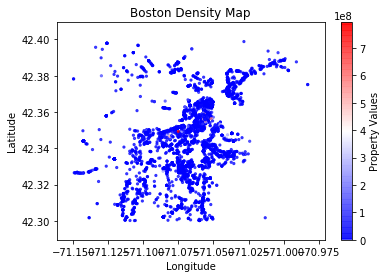

In [11]:
plt.title('Boston Density Map')
#plt.legend(tuple(scat), tuple(labels),loc='best', fontsize='small', ncol=1)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.scatter(yvals, xvals, c=prop_vals, cmap='bwr', alpha=0.7,s=5)
c = plt.colorbar()
c.set_label('Property Values') 
plt.show()
plt.show()

In [12]:
df['Property Values'] = pd.DataFrame(prop_vals)
min_max_scaler = preprocessing.MinMaxScaler()
prop_scaled = min_max_scaler.fit_transform(df['Property Values'].values.reshape(-1,1))
prop_scaled = [p*2 for p in prop_scaled]
df['Property Values'] = pd.DataFrame(prop_scaled)
#df[df['Property Values'] < 100000]
df= df.drop('Ptype', axis=1)
df

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Longitude,Latitude,Property Values
0,0.793779,0.722392,0.001764
1,0.806227,0.733910,0.002052
2,0.803232,0.734369,0.000556
3,0.797874,0.728810,0.000986
4,0.794277,0.723163,0.000476
5,0.820222,0.728437,0.000675
6,0.819905,0.728554,0.000542
7,0.799018,0.730650,0.000284
8,0.798637,0.730037,0.000625
9,0.798256,0.729423,0.004343


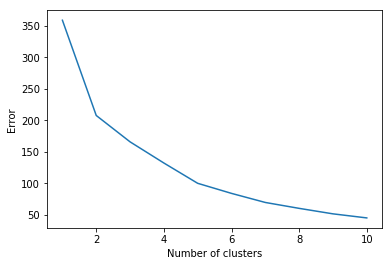

In [13]:
error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(df)
    error[k] = kmeans.inertia_
    
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
graph = plt.ylabel('Error')
plt.show()

The total error of the clustering is: 83.900533090674.

Cluster labels:
[2 2 2 ... 4 4 4]

Counter({0: 1736, 5: 1010, 4: 721, 2: 596, 1: 580, 3: 42})
42.35533806 -71.0603158125 218983000
42.3102758335181 -71.0865573695562 146008000
42.3786803333333 -71.0483172727273 244261000
42.3524676 -71.06320375 202456500
42.340784483871 -71.1097769216945 94973000
42.3334606071429 -71.062686 202456500


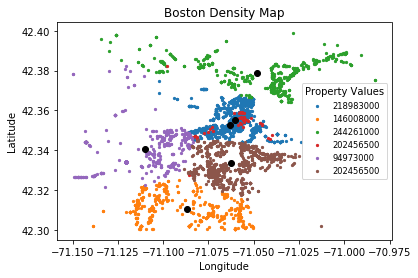

In [14]:
n_clust = 6

kmeans = KMeans(init='k-means++', n_clusters=n_clust, n_init=100)
kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

print("The total error of the clustering is: {}.".format(error))
print('\nCluster labels:')

print(labels)
num = Counter(labels)
print("\n"+str(num))

clusters = [[] for x in range(n_clust*3)]

#separate each restaurant data point by cluster and collect longitude and latitude values for each cluster
for ind in range(len(labels)):
    for j in range(n_clust):    
        if labels[ind] == j:
            clusters[j*3].append(xvals[ind])
            clusters[j*3+1].append(yvals[ind])
            clusters[j*3+2].append(prop_vals[ind])

scat= []
for i in range(len(clusters)):
    if i%3 == 0:       
        a = plt.scatter(clusters[i+1], clusters[i], alpha = 1.0, s=5)
        scat.append(a)

plt.title('Boston Density Map')
plt.ylabel("Latitude")
plt.xlabel("Longitude")

x_centr=[]
y_centr=[]
prop_centr=[]
for val in centroids:
    xv=val[0]
    x_close = min(long, key=lambda x:abs(x-xv))
    ind = long.tolist().index(x_close)
    x = xvals[ind]
    x_centr.append(x)
    
    yv=val[1]
    y_close = min(lat, key=lambda x:abs(x-yv))
    ind = lat.tolist().index(y_close)
    y = yvals[ind]
    y_centr.append(y)
    
    propv=val[1]
    prop_close = min(prop_scaled, key=lambda x:abs(x-propv))
    ind = prop_scaled.index(prop_close)
    prop = prop_vals[ind]
    prop_centr.append(prop)
    
    print(x,y, prop)
    scat.append(a)

plt.scatter(y_centr, x_centr, alpha = 1.0, color = 'black')
plt.legend(tuple(scat), prop_centr, title='Property Values', fontsize='small')  
plt.show()


146
719
670
680
778
501
734
361


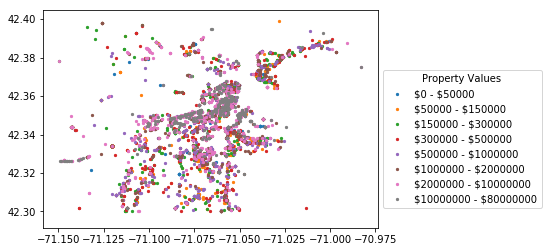

In [19]:
#1 0 - 50,000
#2 50K -150K
#3 150K - 300K
#4 300K -500K
#5 500K - 1000K
#6 1mil to 2 mil
#7 2 mil to 10 mil
#8 10 mil+
poor = pd.DataFrame(prop_vals, columns=['prop_vals'])
poor['Longitude'] = pd.DataFrame(xvals)
poor['Latitude'] = pd.DataFrame(yvals)
bins = [0,50000,150000,300000,500000,1000000,2000000,10000000,80000000]

poor_cats = []
labels = []
scat = []
for i in range(len(bins)-1):
    categories1 = (poor['prop_vals'] > bins[i]) & (poor['prop_vals'] < bins[i+1])
    poor1 = poor[categories1]
    poor_cats.append(poor1)
    l = '\$' + str(bins[i]) + ' - $' + str(bins[i+1])
    a = plt.scatter(poor1['Latitude'], poor1['Longitude'], alpha = 1, s=5, label=str(l))
    labels.append(l)
    scat.append(a)

plt.legend(tuple(scat), tuple(labels), loc='best', bbox_to_anchor=(1, 0.25, 0, 0.5), title = 'Property Values')

for i in poor_cats:
    print(len(i))

plt.savefig('rangedPropVals.png',dpi=300,bbox_inches='tight')
plt.show()